<img src="img/face1.png">
<img src="img/face2.png">
<img src="img/face3.png">

haar cascade: https://github.com/opencv/opencv/tree/master/data/haarcascades

In [1]:
import cv2
import matplotlib.pyplot as plt

## 0-Import Face Classifier

In [2]:
# the face classifier (yüz olup olmamasını sınıflandırıyor)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

## 1-Einstein Face Detector

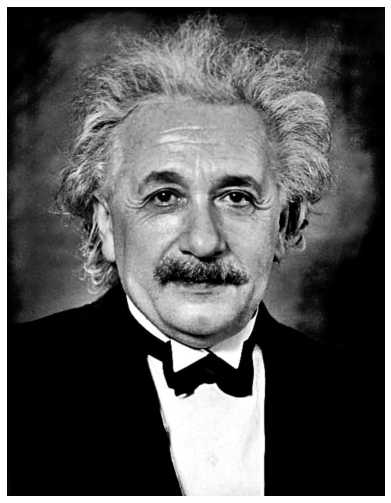

In [3]:
# read einstein image
einstein = cv2.imread("img/einstein.jpg", 0)
plt.figure(figsize=(16,9)), plt.imshow(einstein, cmap = "gray"), plt.axis("off")
plt.show()

In [4]:
face_rectangle = face_cascade.detectMultiScale(einstein)
face_rectangle
# (x,y,w,h) = 128, 164, 398, 398

array([[128, 164, 398, 398]])

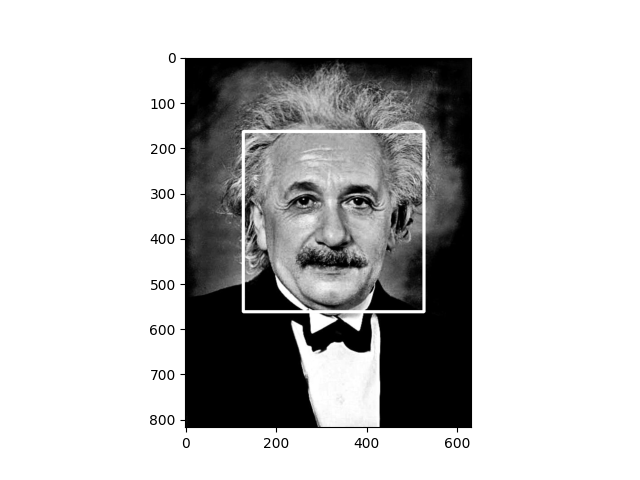

In [5]:
# Rectangle after detecting the face
%matplotlib widget

for (x,y,w,h) in face_rectangle:
    # (x,y)=initial points, (x+w, y+h)=final points
    cv2.rectangle(einstein, pt1 = (x, y), pt2 = (x+w, y+h), color = (255, 255, 255), thickness = 5)

plt.figure(), plt.imshow(einstein, cmap = "gray"), plt.axis("on")
plt.show()

## 2-Barcelona Players' Face Detector

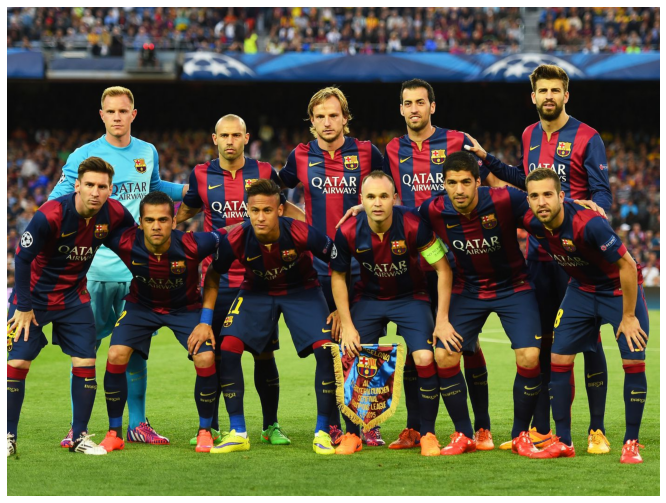

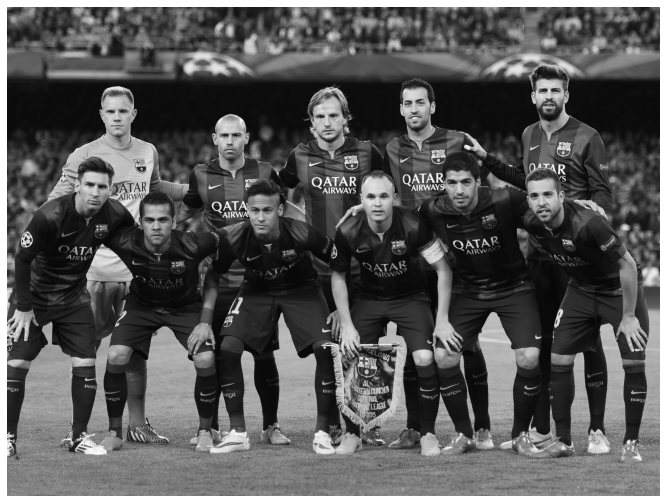

In [6]:
%matplotlib inline
barcelona_original = cv2.imread("img/barcelona.jpg")
barcelona_original = cv2.cvtColor(barcelona_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,9)), plt.imshow(barcelona_original), plt.axis("off")

barcelona = cv2.imread("img/barcelona.jpg", 0)
plt.figure(figsize=(16,9)), plt.imshow(barcelona, cmap = "gray"), plt.axis("off")
plt.show()

In [7]:
face_rectangle2 = face_cascade.detectMultiScale(barcelona, minNeighbors = 7) # default minNeighbors=3
face_rectangle2 # (x,y,w,h) = 1125, 152, 77, 77 => Pique face :)

array([[1125,  152,   77,   77],
       [ 834,  176,   81,   81],
       [ 280,  428,   81,   81],
       [ 505,  406,   82,   82],
       [ 641,  201,   95,   95],
       [ 195,  194,   81,   81],
       [ 435,  243,   87,   87],
       [ 929,  347,   84,   84],
       [ 151,  355,   79,   79],
       [1102,  372,   89,   89],
       [ 750,  373,   91,   91]])

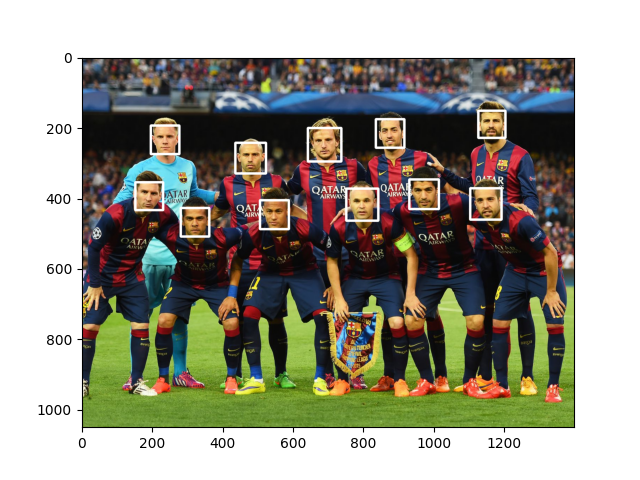

In [8]:
# Rectangle after detecting the face
%matplotlib widget

for (x,y,w,h) in face_rectangle2:
    cv2.rectangle(barcelona_original, pt1 = (x, y), pt2 = (x+w, y+h), color = (255, 255, 255), thickness = 5)

plt.figure(), plt.imshow(barcelona_original, cmap = "gray"), plt.axis("on")
plt.show()

## 3-Face in Vide Detector

In [9]:
cap = cv2.VideoCapture(0)

In [10]:
while True:
    
    ret, frame = cap.read()
    
    if ret:
        
        face_rectangle3 = face_cascade.detectMultiScale(frame, minNeighbors = 7)
            
        for (x,y,w,h) in face_rectangle3:
            cv2.rectangle(frame, pt1 = (x, y), pt2 = (x+w, y+h), color = (255, 255, 255), thickness = 5)        
            cv2.imshow("face detect", frame)
    
    if cv2.waitKey(1) == ord("q"): break
    
cap.release()
cv2.destroyAllWindows()